# Scraping images and creating datasets with Easy-ICD

This notebook will show you how to scrape images for a simple dataset that contains images of different marine animals. Scraping images using Easy-ICD is extremely simple, and requires only one function call with appropriately set arguments. Then, we use the scraped images to create a PyTorch dataset that allows us to easily access and manipulate the images we scraped.

## Required imports

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from easy_icd.scraping.scrape_images import scrape_images
from easy_icd.utils.datasets import create_dataset

## Set up scraping parameters

We first need to specify all the classes that we want in our dataset:

In [24]:
class_names = ['hammerhead shark', 'orca whale', 'manta ray', 'jellyfish', 'axolotl']

We need to specify a list of search terms if we want to search for terms other than the class name for each class. Here, we might want to search for both 'orca whale' and 'killer whale' for the class orca whale, so we use a list:

In [25]:
search_terms = [['hammerhead shark'],
                ['orca whale', 'killer whale'],
                ['manta ray'],
                ['jellyfish'],
                ['axolotl']]

Next, we need to set the number of images per class. We can specify the same number of images for each class, a different number for each class, or a different number for each search term. Here we just ask for 25 images per class. We also set the folder where we store all the scraped images, as well as the size we want each image to be. While we can store each image in their original sizes and resize them when we need to, resizing them before saving makes things a little simpler, so we do that here. We also tell Easy-ICD to crop all the images we save to fit the size we want, so that we don't end up with images that need to be padded to fit the image size we want:

In [26]:
images_per_class = 25
image_size = (512, 512)
image_dir = 'marine_animals'
crop_to_fit = True

Now we're ready to scrape!

In [27]:
scrape_images(class_names, image_dir, search_terms, images_per_class, image_size, crop_to_fit)

{'hammerhead shark': {'hammerhead shark': {'successful': True,
   'num_desired_images': 25,
   'num_saved_images': 25,
   'time_taken_in_seconds': 6.492920637130737},
  'time_taken_in_seconds': 6.493920564651489,
  'num_desired_images': 25,
  'num_saved_images': 25,
  'successful': True},
 'orca whale': {'orca whale': {'successful': True,
   'num_desired_images': 13,
   'num_saved_images': 13,
   'time_taken_in_seconds': 4.630259037017822},
  'killer whale': {'successful': True,
   'num_desired_images': 13,
   'num_saved_images': 13,
   'time_taken_in_seconds': 11.335564136505127},
  'time_taken_in_seconds': 15.96582317352295,
  'num_desired_images': 26,
  'num_saved_images': 26,
  'successful': True},
 'manta ray': {'manta ray': {'successful': True,
   'num_desired_images': 25,
   'num_saved_images': 25,
   'time_taken_in_seconds': 8.825270175933838},
  'time_taken_in_seconds': 8.825270175933838,
  'num_desired_images': 25,
  'num_saved_images': 25,
  'successful': True},
 'jellyfish'

## Create a dataset from the scraped images
Now that we have a dataset, we can create a PyTorch Dataset from the images we scraped, which will allow us to feed the images to a machine learning model, or manipulate the images in different ways. Creating a dataset from a set of images scraped using Easy-ICD also only takes just a one function call. 

Here we do not create train and test splits for the dataset for simplicity, although it is possible to do so.

In [28]:
img_dir = 'marine_animals'
class_names = ['hammerhead shark', 'orca whale', 'manta ray', 'jellyfish', 'axolotl']
one_hot_labels = False
scale_images = True

ds = create_dataset(img_dir, class_names, one_hot_labels, scale_images)
dataloader = DataLoader(ds, batch_size=2, shuffle=True)

Now, we can view some of the images we scraped:

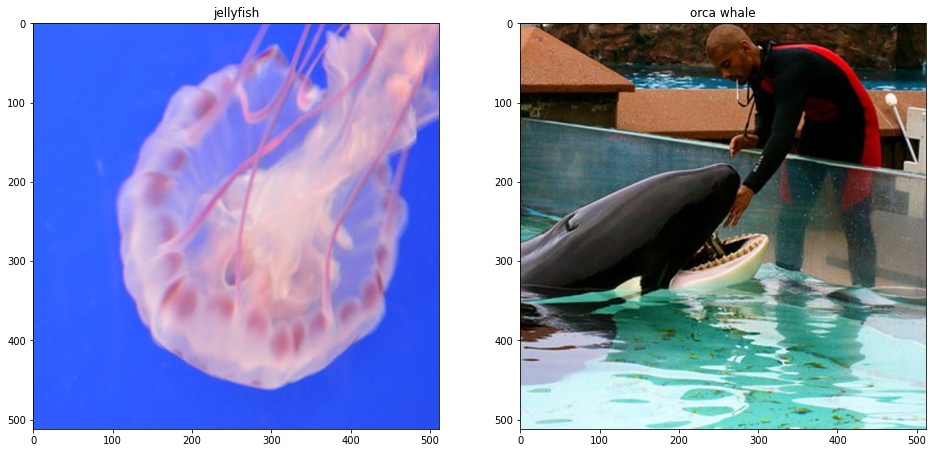

In [34]:
images, labels = next(iter(dataloader))

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for j in range(2):
    ax[j].imshow(np.rot90(np.asarray(images[j]).T, 3))
    ax[j].set_title(class_names[labels[j]])